In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import lightgbm as lgb

In [198]:
df = pd.read_csv('training_v2.csv')

In [ ]:
df.isnull().sum()

In [ ]:
df.head(10)

In [ ]:
#Replacing missing catagorical data with 0

In [ ]:
# df['ethnicity'].fillna(inplace=True, value=0)
# df['gender'].fillna(inplace=True, value=0)
# df['hospital_admit_source'].fillna(inplace=True, value=0)
# df['icu_admit_source'].fillna(inplace=True, value=0)
# df['icu_stay_type'].fillna(inplace=True, value=0)
# df['icu_type'].fillna(inplace=True, value=0)
# df['apache_2_diagnosis'].fillna(inplace=True, value=0)
# df['apache_3j_diagnosis'].fillna(inplace=True, value=0)
# df['apache_3j_bodysystem'].fillna(inplace=True, value=0)
# df['apache_2_bodysystem'].fillna(inplace=True, value=0)

In [199]:
#fill missing catagofical data 

df['ethnicity'].fillna(inplace=True, value='DROP')
df['gender'].fillna(inplace=True, value='DROP')
df['hospital_admit_source'].fillna(inplace=True, value='DROP')
df['icu_admit_source'].fillna(inplace=True, value='DROP')
df['icu_stay_type'].fillna(inplace=True, value='DROP')
df['icu_type'].fillna(inplace=True, value='DROP')
df['apache_3j_bodysystem'].fillna(inplace=True, value='DROP')
df['apache_2_bodysystem'].fillna(inplace=True, value='DROP')

In [214]:
df2 = df[['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']]
df2 = pd.get_dummies(df2)

In [220]:
df2 = df2.drop(['ethnicity_DROP', 'gender_DROP', 'hospital_admit_source_DROP', 'icu_admit_source_DROP', 'apache_3j_bodysystem_DROP', 'apache_2_bodysystem_DROP'], axis=1)

In [222]:
df1 = df.drop(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'], axis=1)

In [230]:
df_encoded = pd.concat([df1,df2], axis=1)

In [ ]:
# dividing the data set by out come for data cleaning and upsampling

In [232]:
mask = (df_encoded['hospital_death'] == 1)
death_df = df_encoded[mask]

In [233]:
death_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
8,80471,10577,118,1,45.0,NaN,0,170.2,114,0.009028,...,1,0,0,0,0,0,0,0,0,0
25,29208,114628,118,1,68.0,26.010703,0,165.1,114,0.758333,...,1,0,0,0,0,0,0,0,0,0
46,40903,55564,118,1,64.0,16.980389,0,180.3,102,2.817361,...,0,0,0,0,1,0,0,0,0,0
58,80233,83826,81,1,55.0,NaN,0,172.7,90,0.013194,...,0,0,0,0,0,0,1,0,0,0
73,75834,43161,118,1,74.0,25.311715,0,167.6,97,15.123611,...,0,0,1,0,0,0,0,0,0,0


In [234]:
death_df.fillna(death_df.mean(), inplace=True)

C:\Users\amber.toro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [235]:
mask = (df_encoded['hospital_death'] == 0)
live_df = df_encoded[mask]

In [236]:
live_df.fillna(live_df.mean(), inplace = True)

In [237]:
final_df = pd.concat([live_df, death_df], axis=0)

In [240]:
final_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,0,68.0,22.730000,0,180.3,92,0.541667,...,1,0,0,0,0,0,0,0,0,0
1,114252,59342,81,0,77.0,27.420000,0,160.0,90,0.927778,...,0,0,0,0,0,0,1,0,0,0
2,119783,50777,118,0,25.0,31.950000,0,172.7,93,0.000694,...,0,0,0,1,0,0,0,0,0,0
3,79267,46918,118,0,81.0,22.640000,1,165.1,92,0.000694,...,1,0,0,0,0,0,0,0,0,0
4,92056,34377,33,0,19.0,29.264902,0,188.0,91,0.073611,...,0,0,0,0,0,0,0,1,0,0


In [268]:
# TEST THESE FEATURE SELECTIONS NEXt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [289]:
labels = final_df.iloc[:,4:].columns

In [295]:
labels = pd.DataFrame(columns=labels)

In [275]:
X = final_df.iloc[:,4:].values
y = final_df.iloc[:,3].values
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3)

In [278]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))

In [280]:
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [298]:
selected_feat = labels.columns[(sel.get_support())]
len(selected_feat)

39

In [299]:
print(selected_feat)

Index(['fio2_apache', 'ph_apache', 'urineoutput_apache', 'd1_mbp_invasive_min',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_lactate_max',
       'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_platelets_max', 'h1_wbc_max', 'h1_wbc_min',
       'h1_arterial_pco2_max', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min'],
      dtype='object')


In [316]:
final_featuers = selected_feat.tolist()

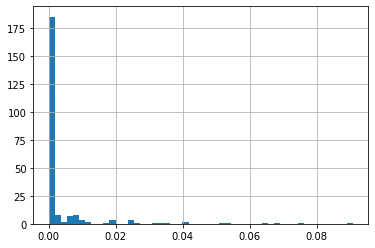

In [315]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist(bins =50)


In [317]:
test_df = final_df[final_featuers]

In [329]:
# Splitting the dataset into the Training set and Test set
X = test_df
y = final_df.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# from sklearn.utils import resample

# #concat our training data back together

# X = np.column_stack((y_train, X_train))
# X = pd.DataFrame(X)
# X.columns = [final_df.columns.values]

# dmask = (X['hospital_death'] == 1)
# dies = X[dmask]

# lmask = (X['hospital_death'] == 0)
# lives = X[lmask]

# #upsample minority class
# df_minority_upsampled = resample(dies,
#                                 replace=True,
#                                 n_samples=len(lives),
#                                 random_state=123)

# #combine majority class with upsampled minority class
# df_upsampled = pd.concat([lives, df_minority_upsampled])

In [256]:
# X_train = df_upsampled.iloc[:,1:].values
# y_train = df_upsampled.iloc[:,0].values

In [330]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [331]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\amber.toro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [332]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [334]:
y_pred_b = np.where(y_pred<.5, 0, 1)

[[16740    21]
 [    7  1575]]
0.9984735321376002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16761
           1       0.99      1.00      0.99      1582

    accuracy                           1.00     18343
   macro avg       0.99      1.00      1.00     18343
weighted avg       1.00      1.00      1.00     18343



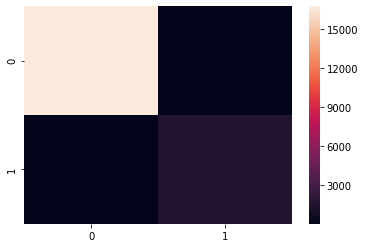

In [335]:
#evaluating the model
hm = confusion_matrix(y_test, y_pred_b)
sns.heatmap(hm)
print(hm)
print(accuracy_score(y_test, y_pred_b))
print(classification_report(y_test, y_pred_b))

In [339]:
unlabled_df = pd.read_csv('unlabeled.csv')

In [341]:
pred_df = unlabled_df[final_featuers]

In [346]:
pred_df

,fio2_apache,ph_apache,urineoutput_apache,d1_mbp_invasive_min,d1_sysbp_invasive_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_sysbp_invasive_max,...,h1_lactate_min,h1_platelets_max,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,NaN,NaN,1121.126400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,843.436800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1728.000000,71.0,102.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.70,7.350,1434.412800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,248.0,9.7,9.7,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,37.0,66.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1428.624000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,158.0,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2048.630400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,17.9,17.9,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
pred_df.isnull().sum()

fio2_apache               29718
ph_apache                 29718
urineoutput_apache        15039
d1_mbp_invasive_min       27743
d1_sysbp_invasive_min     27731
h1_diasbp_invasive_max    30627
h1_diasbp_invasive_min    30627
h1_mbp_invasive_max       30652
h1_mbp_invasive_min       30652
h1_sysbp_invasive_max     30618
h1_sysbp_invasive_min     30618
d1_lactate_max            27760
d1_lactate_min            27760
h1_albumin_max            35984
h1_albumin_min            35984
h1_bilirubin_max          36054
h1_bilirubin_min          36054
h1_bun_max                30620
h1_bun_min                30620
h1_calcium_max            30787
h1_calcium_min            30787
h1_creatinine_max         30547
h1_creatinine_min         30547
h1_hco3_max               31022
h1_hco3_min               31022
h1_hemaglobin_min         30378
h1_hematocrit_max         30254
h1_hematocrit_min         30254
h1_lactate_max            34890
h1_lactate_min            34890
h1_platelets_max          30792
h1_wbc_m